**Alam Rizki F (1301180452)
IF - 42 - 10**



In [3]:
import random
import numpy as np
from matplotlib import animation
import matplotlib.pyplot as plt

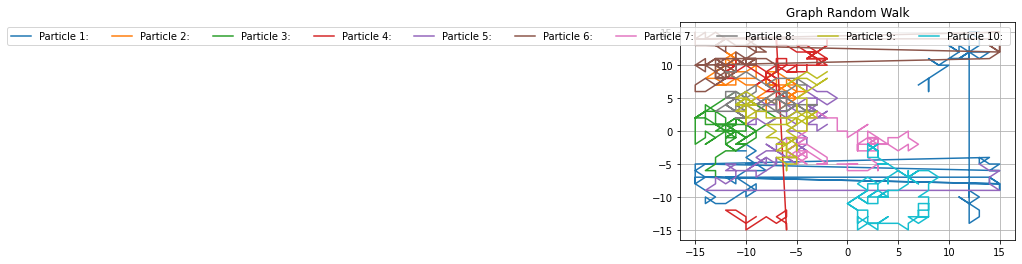

In [17]:
class Random_walk:
    # initialize variables
    def __init__(self, x_min, x_max, y_min, y_max, particle, iteration):
        self.x_min = x_min
        self.x_max = x_max
        self.y_min = y_min
        self.y_max = y_max
        self.particle = particle
        self.iteration = iteration
        self.x_pos = np.zeros((self.particle, self.iteration))
        self.y_pos = np.zeros((self.particle, self.iteration))

        self.generate_loc()

    # print format
    def print_loc(self):
        print("")
        for i in range(self.particle):
            print("particle %i ([x],[y])" % (i+1), ": { ", sep="")
            for j in range(self.iteration):
                print("#%d. " % (j+1), "[", self.x_pos[i][j],
                      "]", ",[", self.y_pos[i][j], "] ", sep="")
            print("}")
            print("")

    # Periodic Boundary Condition
    def pb_condition(self, i, j):
        x_range = self.x_max - self.x_min
        y_range = self.y_max - self.y_min

        if self.x_pos[i][j+1] > self.x_max:
            self.x_pos[i][j+1] -= x_range
        elif self.x_pos[i][j+1] < self.x_min:
            self.x_pos[i][j+1] += x_range
        if self.y_pos[i][j+1] > self.y_max:
            self.y_pos[i][j+1] -= y_range
        elif self.y_pos[i][j+1] < self.y_min:
            self.y_pos[i][j+1] += y_range

    # graph visualization
    def visualize_graph(self):
        plt.title('Graph Random Walk')

        plt.grid(True)
        for i in range(self.particle):
            plt.plot(self.x_pos[i], self.y_pos[i],
                     label="Particle %i: " % ((i+1),))

        plt.legend(loc='upper right', ncol=(i+1))
        plt.show()

    # Generate location of x,y of particle for n_iteration
    def generate_loc(self):
        for i in range(self.particle):
            # Generate initial x_position per particle on random float betweeen x_min,x_max
            self.x_pos[i][0] = random.randrange(self.x_min, self.x_max)
            # Generate initial y_position per particle on random float betweeen y_min,y_max
            self.y_pos[i][0] = random.randrange(self.y_min, self.y_max)
            for j in range(0, self.iteration - 1):
                rand = random.random()  # generate random probabilities
                # Kanan
                if rand <= 0.125:
                    self.x_pos[i][j+1] = self.x_pos[i][j] + 1
                    self.y_pos[i][j+1] = self.y_pos[i][j]
                 # Kanan bawah
                elif rand <= 0.250:
                    self.x_pos[i][j+1] = self.x_pos[i][j] + 1
                    self.y_pos[i][j+1] = self.y_pos[i][j] - 1
                # Bawah
                elif rand <= 0.375:
                    self.x_pos[i][j+1] = self.x_pos[i][j]
                    self.y_pos[i][j+1] = self.y_pos[i][j] - 1
                # Kiri Bawah
                elif rand <= 0.500:
                    self.x_pos[i][j+1] = self.x_pos[i][j] - 1
                    self.y_pos[i][j+1] = self.y_pos[i][j] - 1
                # Kiri
                elif rand <= 0.625:
                    self.x_pos[i][j+1] = self.x_pos[i][j] - 1
                    self.y_pos[i][j+1] = self.y_pos[i][j]
                # Kiri atas
                elif rand <= 0.750:
                    self.x_pos[i][j+1] = self.x_pos[i][j] - 1
                    self.y_pos[i][j+1] = self.y_pos[i][j] + 1
                # Atas
                elif rand <= 0.875:
                    self.x_pos[i][j+1] = self.x_pos[i][j]
                    self.y_pos[i][j+1] = self.y_pos[i][j] + 1
                else:
                    self.x_pos[i][j+1] = self.x_pos[i][j] + 1
                    self.y_pos[i][j+1] = self.y_pos[i][j] + 1
                self.pb_condition(i, j)  # checking
        #self.print_loc()  # print out x_pos & y_pos result
        self.visualize_graph()  # generate graph visualization

    # CALLING MAIN FUNCTION
    # Visualize Animation
s = Random_walk(-15, 15, -15, 15, 10, 100)